In [1]:
#import import_ipynb
import bio_age as BA
import pandas as pd
import scipy as sp #scipy for regressions
import numpy as np

You are running BA_NB_Final at 2020-03-29 17:46:55.816760


# Example 1: NHANES III Dataset

In [2]:
# load training set
trainset = pd.read_csv('BioAgeSample_NHANESIII_without_fvc.txt', delimiter='\t')
trainset.head()

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc
0,4,11,160,0.21,0.7,89,4.1,4.6,32,0.183278,0.517,3089,1,12.55,126,3536
1,9,14,236,0.21,0.8,59,4.0,5.3,48,2.066707,1.946,2512,1,4.95,131,3436
2,10,14,225,0.21,1.2,74,4.5,4.6,35,2.950445,0.349,3911,0,5.90,130,4630
3,19,10,187,0.21,1.1,86,4.2,5.7,44,0.410218,3.001,2594,0,6.10,133,4080
4,34,15,216,0.21,0.8,84,3.9,5.5,42,0.534605,3.001,2331,1,5.05,100,2850


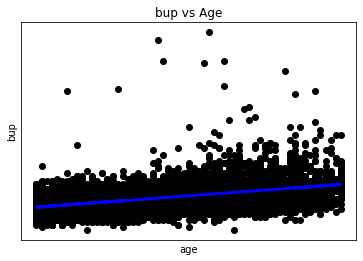

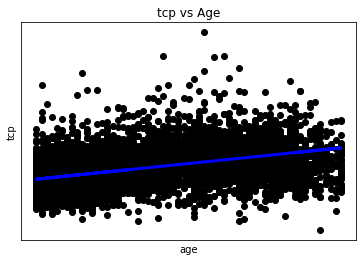

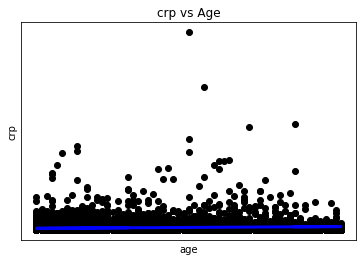

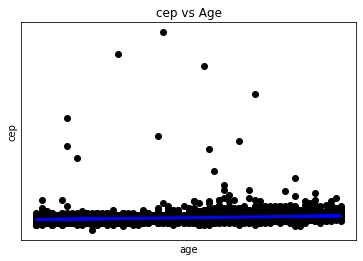

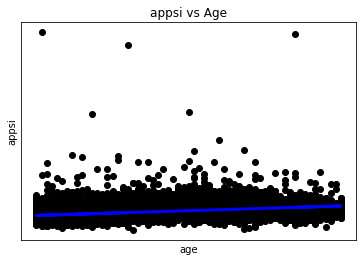

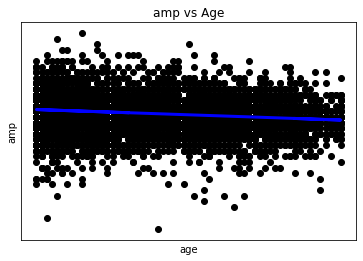

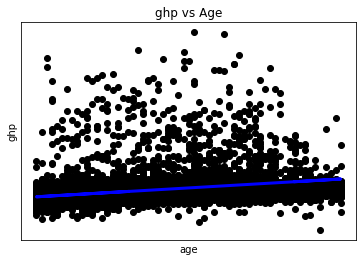

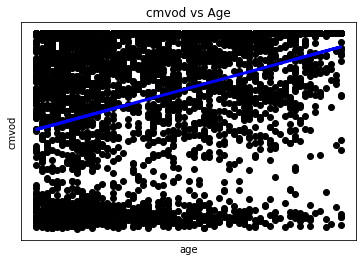

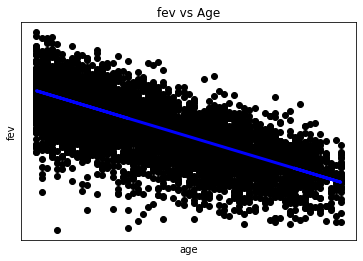

Cannot do LINEAR REGRESSION analysis for wbc


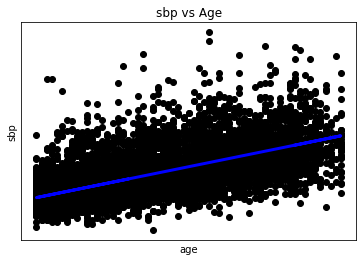

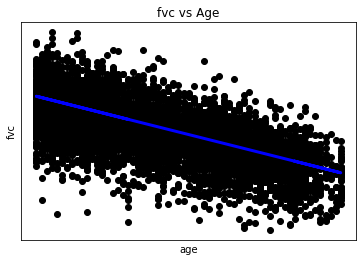

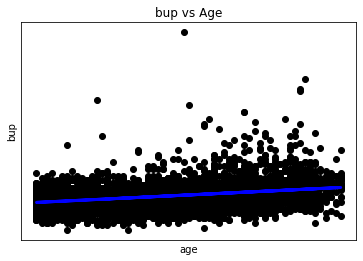

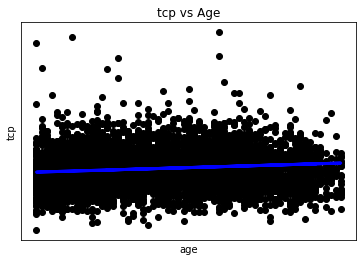

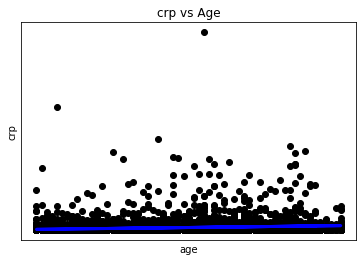

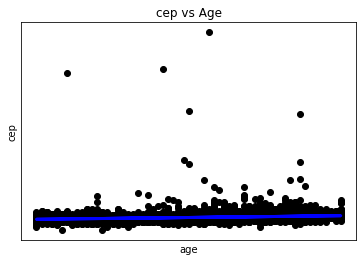

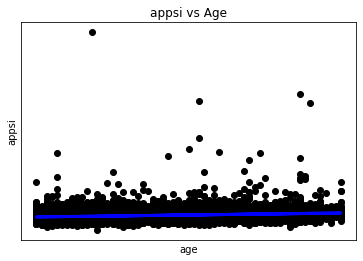

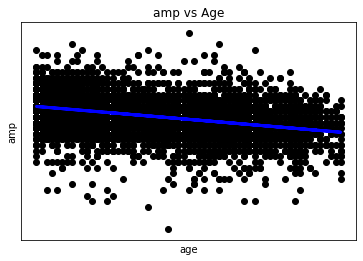

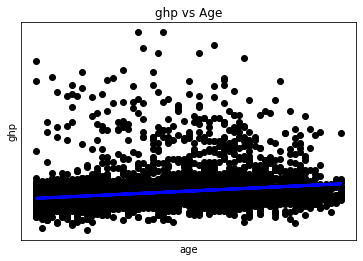

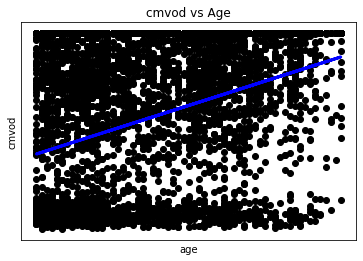

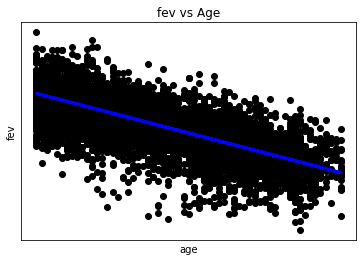

Cannot do LINEAR REGRESSION analysis for wbc


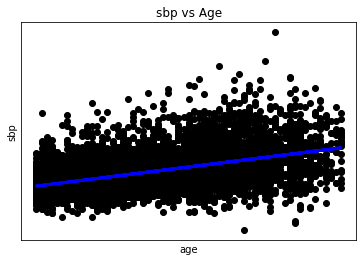

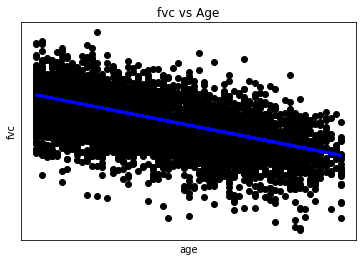

In [3]:
# find indices for age, group, primary index, sample weights
header_names = list(trainset)
age_index = header_names.index('age')
genderindex = header_names.index('female') # this is the name of the group
seqn = header_names.index('seqn')
samp_wt_index = header_names.index('samp_wt')

results = BA.KDM_model(trainset, trainset, 'cache_ex1.json', 'NHANES_eg_results', age_index, genderindex, seqn, samp_wt_index)

In [4]:
# View Results
print('Mean residual:', results[0])
print('Median residual:', results[1])
print('Median percent residual', results[2])
print('R-squared:', results[3])

Mean residual: 1.3227190927206718
Median residual: 0.5815186882747128
Median percent residual 1.123719360943522
R-squared: 0.0


### Show Means and Correlations

In [5]:
a = BA.Summary(trainset, age_index, samp_wt_index) # load Class

# Means
means = a.mean()


MEANS:
age		49.6111170841845
amp		4.120524672250296
appsi		86.87571228900119
bup		14.22212665304806
cep		1.0821847082625526
cmvod		2.114541301120632
crp		0.4977722776669176
female		0.5313407160520374
fev		2889.8896892807225
fvc		3735.0148371142886
ghp		5.653101816245566
samp_wt		1.2324121378889368
sbp		126.49069992473927
seqn		27888.865605848834
tcp		210.92699709708634
wbc		nan


In [6]:
# Correlations
corrs = a.corr()

Cannot perfom correlation on wbc

CORRELATIONS: (r, p-value)
age		(0.5511896768489757, 4.3373575018631186e-209)
amp		(-0.07625091382025119, 9.012524634320797e-05)
appsi		(0.19658040806040863, 2.4391057372163816e-24)
bup		(0.2558493232690293, 1.3138030234871057e-40)
cep		(0.18615572424283136, 5.966749944618164e-22)
cmvod		(0.17067925546271565, 1.1759769250904084e-18)
crp		(0.07697157731204438, 7.722139844408423e-05)
female		(-0.07195608610524179, 0.00022023252917034188)
fev		(-0.33906021045847023, 8.230327764002518e-72)
fvc		(-0.28268055007025755, 1.5019763578099004e-49)
ghp		(0.19339057187324382, 1.3573492068726726e-23)
samp_wt		(-0.18987116418819455, 8.713784334819661e-23)
sbp		(1.0, 0.0)
seqn		(0.029437192317104777, 0.13108765314561013)
tcp		(0.19476757725580587, 6.4934057975695524e-24)


### Visualize these results

In [7]:
results = pd.read_csv('NHANES_eg_results_test.csv')

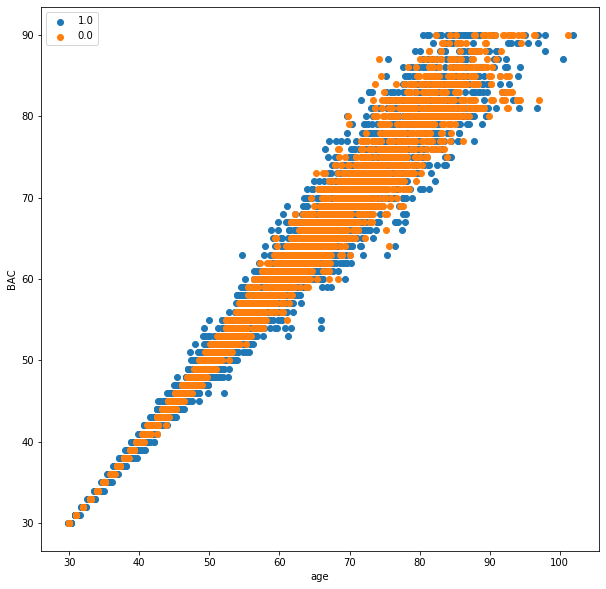

In [8]:
a = BA.Visualize(results)
a.plot('BAC','age','female')